In [ ]:
"""Question 2"""

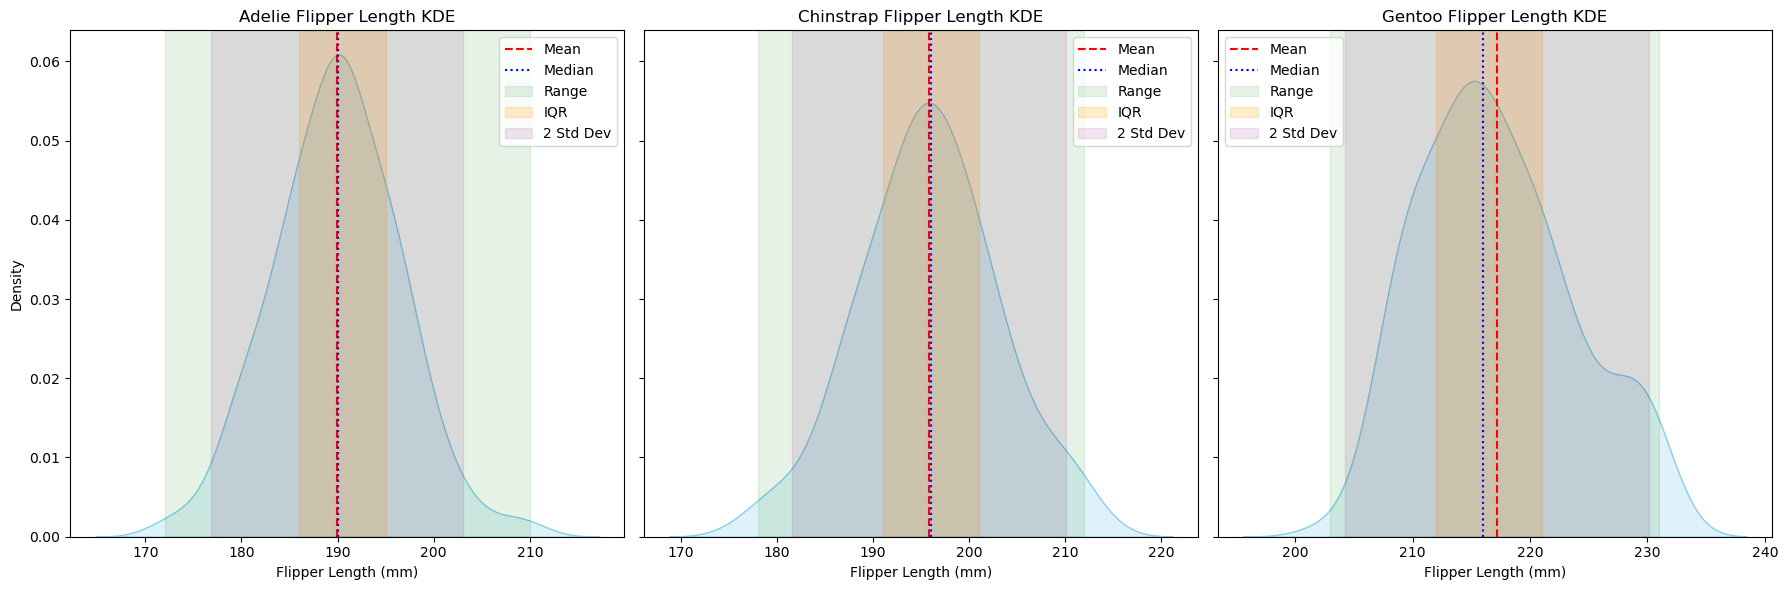

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Filter out NaN values in flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Create a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Create KDE plots and statistical lines for each species
for ax, species in zip(axes, penguins['species'].unique()):
    data = penguins[penguins['species'] == species]
    flipper_lengths = data['flipper_length_mm']
    
    # Calculate statistics
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    min_value = flipper_lengths.min()
    max_value = flipper_lengths.max()
    q1 = flipper_lengths.quantile(0.25)
    q3 = flipper_lengths.quantile(0.75)
    std = flipper_lengths.std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std

    # Plot KDE
    sns.kdeplot(flipper_lengths, ax=ax, fill=True, color='skyblue')

    # Add mean and median lines
    ax.axvline(mean, color='red', linestyle='--', label='Mean')
    ax.axvline(median, color='blue', linestyle=':', label='Median')

    # Add range (min to max) as shaded area
    ax.axvspan(min_value, max_value, color='green', alpha=0.1, label='Range')

    # Add IQR (Q1 to Q3) as shaded area
    ax.axvspan(q1, q3, color='orange', alpha=0.2, label='IQR')

    # Add 2*std range as shaded area
    ax.axvspan(lower_bound, upper_bound, color='purple', alpha=0.1, label='2 Std Dev')

    # Set titles and labels
    ax.set_title(f'{species} Flipper Length KDE')
    ax.set_xlabel('Flipper Length (mm)')
    ax.legend()

# Set common y-axis label
axes[0].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
"""Question 3"""

I prefer KDE plots because they give a clear, continuous picture of the distribution’s shape without the jagged look of histograms or the minimalistic summary of box plots. Especially when comparing data distributions, the smoothness of KDE plots helps me see where the data clusters and how spread out it is. However, I recognize that KDEs might smooth out important features like outliers, so I would still use box plots for quick comparisons across groups and outlier detection.

In [ ]:
"""Question 4"""

In [18]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. B, D
2. B, C
3. C, D
4. A, C

In [ ]:
"""Question 6"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB

Survival rate by gender:
 Sex
female    0.742038
male      0.190227
Name: Survived, dtype: float64

Survival rate by passenger class:
 Pclass
1    0.629630
2    0.472826
3    0.244353
Name: Survived, dtype: float64


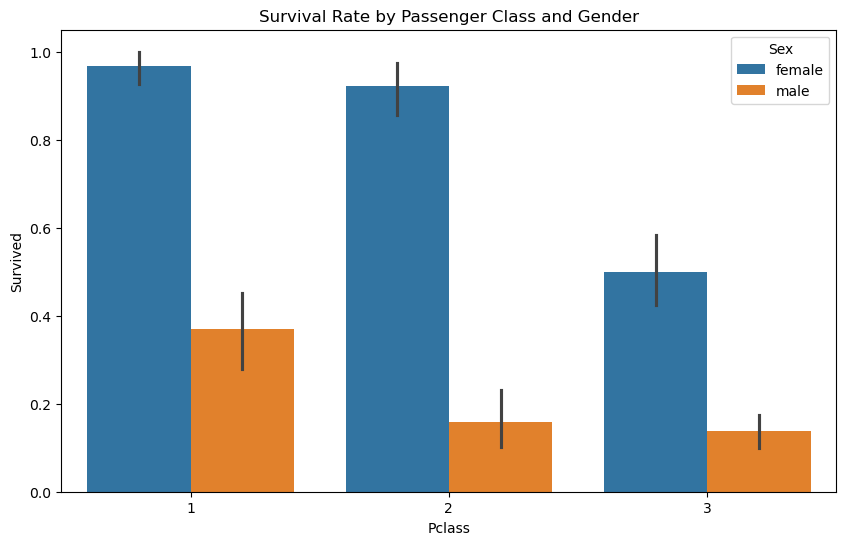

In [19]:
import pandas as pd

# Load Titanic dataset from seaborn (seaborn provides easy access to this dataset)
titanic_url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_df = pd.read_csv(titanic_url)

# Display the first few rows of the dataset
titanic_df.head()

# Get basic information about the dataset
titanic_df.info()

# View summary statistics for numeric columns
titanic_df.describe()

# Explore the distribution of survival based on gender
survival_by_gender = titanic_df.groupby('Sex')['Survived'].mean()
print("\nSurvival rate by gender:\n", survival_by_gender)

# Explore the distribution of survival based on passenger class
survival_by_class = titanic_df.groupby('Pclass')['Survived'].mean()
print("\nSurvival rate by passenger class:\n", survival_by_class)

# Visualize survival by class and gender
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df)
plt.title("Survival Rate by Passenger Class and Gender")
plt.show()

Survived: Whether the passenger survived (0 = No, 1 = Yes).

Pclass: The class of the passenger (1 = First, 2 = Second, 3 = Third).

Name: The name of the passenger.

Sex: The gender of the passenger.

Age: The age of the passenger.

Siblings/Spouses Aboard: Number of siblings or spouses aboard the Titanic.

Parents/Children Aboard: Number of parents or children aboard the Titanic.

Ticket: The ticket number.

Fare: The amount of money paid for the ticket.

Cabin: The cabin number (if known).

Embarked: The port where the passenger boarded (C = Cherbourg; Q = Queenstown; S = Southampton).

In [ ]:
"""Interesting Aspects of the Data:"""

Survival by Gender: Women were more likely to survive than men.
    
Class and Survival: First-class passengers had a higher chance of survival compared to those in third class.

Age and Survival: Children had a higher likelihood of survival, while older passengers tended to have a lower survival rate.

Family Influence: The number of family members aboard can influence survival rates. Passengers with fewer family members had different chances of survival.


link for chatbot session:

https://chatgpt.com/share/66f4ce5b-33c4-800d-9ab3-c7d0da5ddc52

In [ ]:
"""question 1"""

In [20]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Load the penguins dataset from seaborn
penguins = sns.load_dataset("penguins")

# Remove rows with missing values
penguins = penguins.dropna(subset=["flipper_length_mm"])

# Function to add statistical lines and rectangles
def add_stat_annotations(fig, species_data):
    # Calculate statistics
    mean = species_data["flipper_length_mm"].mean()
    median = species_data["flipper_length_mm"].median()
    flipper_range = (species_data["flipper_length_mm"].min(), species_data["flipper_length_mm"].max())
    q1 = species_data["flipper_length_mm"].quantile(0.25)
    q3 = species_data["flipper_length_mm"].quantile(0.75)
    std_dev = species_data["flipper_length_mm"].std()
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color='green', dash='dash'), annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=median, line=dict(color='red', dash='dash'), annotation_text="Median", annotation_position="top right")
    
    # Add rectangles for different ranges
    # Full range (min to max)
    fig.add_vrect(x0=flipper_range[0], x1=flipper_range[1], fillcolor="blue", opacity=0.1, annotation_text="Range", line_width=0)
    
    # Interquartile range (IQR: Q1 to Q3)
    fig.add_vrect(x0=q1, x1=q3, fillcolor="orange", opacity=0.2, annotation_text="IQR", line_width=0)
    
    # Two standard deviations around the mean
    fig.add_vrect(x0=mean - 2 * std_dev, x1=mean + 2 * std_dev, fillcolor="purple", opacity=0.2, annotation_text="2 Std Dev", line_width=0)

# Loop through each species and create a separate histogram
for species in penguins["species"].unique():
    species_data = penguins[penguins["species"] == species]
    
    # Create a histogram for flipper length
    fig = px.histogram(species_data, x="flipper_length_mm", title=f"Flipper Length Distribution for {species}", nbins=20)
    
    # Add statistical annotations
    add_stat_annotations(fig, species_data)
    
    # Show the plot
    fig.show()

In [ ]:
"""question 5"""

In [21]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median


array([3.3678893])

Relationship Between Mean, Median, and Skewness:

Right-skewed distribution (positive skew):
The mean is greater than the median because the long tail of large values pulls the mean to the right.

Left-skewed distribution (negative skew):
The mean is less than the median because the long tail of small values pulls the mean to the left.

The mean is more affected by extreme values (outliers) than the median, which stays closer to the center of the data.


Code:

The code generates right-skewed and left-skewed distributions using the gamma distribution and its negative.

It calculates and visualizes the mean and median on histograms, showing their relationship in both skewed distributions.


Conclusion:

In skewed distributions, the mean shifts towards the tail while the median stays near the center of the bulk of data.

In [ ]:
"""question 7"""

In [22]:
!pip install plotly pandas
import plotly.express as px

# Load the Gapminder dataset directly from Plotly
gapminder = px.data.gapminder()

# Create an animated bubble chart
fig = px.scatter(
    gapminder, 
    x="gdpPercap", 
    y="lifeExp", 
    animation_frame="year", 
    animation_group="country", 
    size="pop", 
    color="continent", 
    hover_name="country", 
    log_x=True,  # Log scale for GDP per capita
    size_max=60,  # Max size for the population bubbles
    range_x=[100, 100000],  # GDP per capita range
    range_y=[20, 90],  # Life expectancy range
    title="Gapminder Animation: GDP vs Life Expectancy"
)

# Customize the layout
fig.update_layout(
    xaxis_title="GDP per Capita",
    yaxis_title="Life Expectancy",
    title_font_size=22,
    title_x=0.5,
    showlegend=True,
    legend_title_text='Continent',
)

# Display the animated plot
fig.show()

In [ ]:
"""question 8"""

In [23]:
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct by appending the gender to the name
bn['name'] = bn['name'] + " " + bn['sex']

# Calculate rank for each name based on percent popularity within each year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort the data by name and year for consistency
bn = bn.sort_values(['name', 'year'])

# Calculate the "percent change" for name popularity between consecutive years
bn['percent change'] = bn['percent'].diff()

# Mark where a new name appears (reset the 'percent change' for a new name to its 'percent')
new_name = [True] + list(bn['name'][:-1].values != bn['name'][1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort again by year to maintain chronological order
bn = bn.sort_values('year')

# Restrict the dataset to more common names (where percent > 0.001)
bn = bn[bn['percent'] > 0.001]

# Create the animated scatter plot
fig = px.scatter(
    bn,
    x="percent change",        # X-axis: percent change in name popularity
    y="rank",                  # Y-axis: rank of the name (lower rank means more popular)
    animation_frame="year",    # Year-based animation
    animation_group="name",    # Group by name for animation consistency
    size="percent",            # Size of the bubbles based on name popularity percent
    color="sex",               # Color based on sex (male/female)
    hover_name="name",         # Hover shows the name of the baby
    size_max=50,               # Set maximum bubble size
    range_x=[-0.005, 0.005]    # Set the X-axis range for percent change
)

# Reverse the Y-axis so that rank 1 is at the top
fig.update_yaxes(autorange='reversed')

# Show the plot
fig.show()